In [4]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from scipy.spatial.distance import cdist
import random
import os
import sys
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import numpy as np

from torchvision import datasets
from torchvision import transforms

In [15]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import Normalizer


tform1 = StandardScaler()
tform=transforms.Compose([
                           transforms.ToTensor()])
def fileFeedforGNN(name):

  data = pd.read_table(name)

  

  y = data.iloc[:,-3].values
  
  
  print(np.unique(y))


  graphList = []
  

# 'dime' 'leadpencil' 'plasticsheet' 'quarter' 'wood'
    
  #num_objects	r_std	r_var	r_mean	r_min	r_max	snr_std	snr_var	snr_mean	snr_min	snr_max	noise_std	noise_var	noise_mean	noise_min	noise_max	obj	environment	
  X_array = data.iloc[:, 0:16].values

  X_array = tform1.fit_transform(X_array)
  

  addList_metal, addList_plastic, addList_glass, addList_paper  = [],[],[],[]
    
  for i in range(len(X_array)):
    intarray = X_array[i]
    if(y[i] =='metal' or y[i] == 'metal1' or y[i] =='metal2' or y[i] == 'metal3'):
      addList_metal.append(intarray)
    elif (y[i] =='plastic' or y[i] == 'plastic1' or y[i] =='plastic2' or y[i] == 'plastic3'):
      addList_plastic.append(intarray)
    elif (y[i] =='glass' or y[i] == 'glass1' or y[i] =='glass2' or y[i] == 'glass3'):
      addList_glass.append(intarray)
    elif (y[i] =='paper' or y[i] == 'paper1' or y[i] =='paper2' or y[i] == 'paper3'):
      addList_paper.append(intarray)
   
  
  len_img = 40
  for i in range(len(addList_metal) - (len_img-1) ):
    
    
        #img = addList_bot[i]
        
        img = np.array(addList_metal[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))
        
        # if(i<1):
        #     print(img.shape)
        #     print(img)
        
        graphList.append((img,0))

  for i in range(len(addList_plastic)  - len_img-1):
    
        #img = addList_clothes[i]
    
        img = np.array(addList_plastic[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))      
        # if(i<1):
        #     print(img)
        
        graphList.append(((img),1))
        
  for i in range(len(addList_glass) - len_img-1):
        
        #img = addList_plastics[i]
        img = np.array(addList_glass[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))    
        # if(i<1):
        #     print(img)
            
        graphList.append(((img),2))
        
  
  for i in range(len(addList_paper) - len_img-1):
    #img = addList_steel[i]

        img = np.array(addList_paper[i:i+len_img])
        img = np.reshape(img, (1,len_img*16))       
        # if(i<1):
        #     print(img)
        graphList.append(((img),3))
  
  
  
  print(len(graphList))
    
    
 
  return graphList




############################## data loading for 3.5 inch#####################

graphList_lablight_3_5 = fileFeedforGNN('lablight_3_5_static.txt')
graphList_night_3_5 = fileFeedforGNN('night_3_5_static.txt')
#graphList_sunny_3_5 = fileFeedforGNN('sunny_data_7.txt')


lablight_train_len = int(len(graphList_lablight_3_5)*0.7)
night_train_len = int(len(graphList_night_3_5)*0.7)
#sunny_tarin_len = int(len(graphList_sunny_3_5)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_3_5)
random.shuffle(graphList_night_3_5)
#random.shuffle(graphList_sunny_3_5)

train_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[0:lablight_train_len],batch_size)  
test_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[lablight_train_len:],test_batch_size) 

train_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[0:night_train_len],batch_size)  
test_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[night_train_len:],test_batch_size) 

#train_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[0:sunny_tarin_len],batch_size)  
#test_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_3_5))
print(len(graphList_night_3_5))
#print(len(graphList_sunny_3_5))



############################## data loading for 7 inch#####################

graphList_lablight_7= fileFeedforGNN('lablight_7_static.txt')
graphList_night_7 = fileFeedforGNN('night_7_static.txt')
#graphList_sunny_7 = fileFeedforGNN('sunny_data_53.txt')


lablight_train_len = int(len(graphList_lablight_7)*0.7)
night_train_len = int(len(graphList_night_7)*0.7)
#sunny_tarin_len = int(len(graphList_sunny_7)*0.7)



random.shuffle(graphList_lablight_7)
random.shuffle(graphList_night_7)
#random.shuffle(graphList_sunny_7)

train_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[0:lablight_train_len],batch_size)  
test_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[lablight_train_len:],test_batch_size) 

train_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[0:night_train_len],batch_size)  
test_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[night_train_len:],test_batch_size) 

#train_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[0:sunny_tarin_len],batch_size)  
#test_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[sunny_tarin_len:],test_batch_size) 

print(len(test_loader_lablight_7)*64)

print(len(graphList_lablight_7))
print(len(graphList_night_7))
#print(len(graphList_sunny_7))



#print(len(train_loader_sunny_7))

['glass1' 'glass2' 'glass3' 'metal' 'metal1' 'metal2' 'paper' 'paper1'
 'paper2' 'plastic' 'plastic1' 'plastic2']
68891
['glass1' 'glass2' 'glass3' 'metal' 'metal1' 'metal2' 'paper' 'paper1'
 'paper2' 'plastic' 'plastic1' 'plastic2']
71622
68891
71622
['glass1' 'glass2' 'glass3' 'metal' 'metal1' 'metal2' 'paper' 'paper1'
 'paper2' 'plastic' 'plastic1' 'plastic2']
71319
['glass1' 'glass2' 'glass3' 'metal' 'metal1' 'metal2' 'paper' 'paper1'
 'paper2' 'plastic' 'plastic1' 'plastic2']
71243
21440
71319
71243


In [16]:


print(len(train_loader_lablight_7))




781


In [17]:
import torch.utils.data as data
from PIL import Image
import os
import os
import torch.backends.cudnn as cudnn
import torch.utils.data
from torchvision import transforms

from torchvision import datasets

from torch.autograd import Function


class ReverseLayerF(Function):

    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha

        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha

        return output, None




import torch.nn as nn

conv_row,conv_col = 1,64
out_channel = 1


output_class = 4
class CNNModel(nn.Module):

    def __init__(self):
        super(CNNModel, self).__init__()
        self.feature = nn.Sequential()
        
        self.feature.add_module('f_conv1',nn.Conv1d(1, 2, 20,2))
        self.feature.add_module('f_relu1', nn.ReLU(True))
        self.feature.add_module('f_conv2',nn.Conv1d(2, 2, 20,2))
        self.feature.add_module('f_relu2', nn.ReLU(True))
        self.feature.add_module('f_conv3',nn.Conv1d(2, 1, 20,2))
        self.feature.add_module('f_relu3', nn.ReLU(True))
        # self.feature.add_module('f_conv4',nn.Conv1d(2, 1, 20,2))
        # self.feature.add_module('f_relu4', nn.ReLU(True))
        

        
     
       


        self.class_classifier = nn.Sequential()
        self.class_classifier.add_module('c_fc1', nn.Linear(conv_row * conv_col * out_channel, 32))
        self.class_classifier.add_module('c_relu1', nn.ReLU(True))
        self.class_classifier.add_module('c_fc2', nn.Linear(32, 16))
        self.class_classifier.add_module('c_relu2', nn.ReLU(True))
        self.class_classifier.add_module('c_fc3', nn.Linear(16, output_class))
        self.class_classifier.add_module('c_softmax', nn.Softmax(dim=1))

        self.domain_classifier = nn.Sequential()
        self.domain_classifier.add_module('d_fc1', nn.Linear(conv_row * conv_col * out_channel, 32))
        
        self.domain_classifier.add_module('d_relu1', nn.ReLU(True))
        self.domain_classifier.add_module('d_fc2', nn.Linear(32, 2))
       
        self.domain_classifier.add_module('d_softmax', nn.Softmax(dim=1))

    def forward(self, input_data, alpha=0):
        #input_data = input_data.expand(input_data.data.shape[0], 3, 28, 28)
        # print("I am in forward")
        # print(input_data.data.shape[0])
        input_data = input_data.float()
        feature = self.feature(input_data)
        #print(feature.shape)
        feature = feature.view(-1, conv_row * conv_col * out_channel)
        reverse_feature = ReverseLayerF.apply(feature, alpha)
        class_output = self.class_classifier(feature)
        domain_output = self.domain_classifier(reverse_feature)

        return feature,class_output, domain_output

    



def test(my_net,dataloader):
    #assert dataset_name in ['MNIST', 'mnist_m']

    model_root = ''
    

    cuda = True
    cudnn.benchmark = True

   
  

    my_net = my_net.eval()

    if cuda:
        my_net = my_net.cuda()

    len_dataloader = len(dataloader)
    data_target_iter = iter(dataloader)

    i = 0
    n_total = 0
    n_correct = 0
    
    

    while i < len_dataloader:

        # test model using target data
        data_target = next(data_target_iter)
        t_img, t_label = data_target
        
        

        batch_size = len(t_label)

        if cuda:
            t_img = t_img.cuda()
            t_label = t_label.cuda()

        feature,noneed,class_output = my_net(input_data=t_img)
        pred = class_output.data.max(1, keepdim=True)[1]
        
        n_correct += pred.eq(t_label.data.view_as(pred)).cpu().sum()
        n_total += batch_size

        i += 1
        
        del t_img, t_label
        
        #trueone+=(pred.reshape(len(t_label)).tolist())
        #predone+=(t_label.tolist())
    
    
    # print(trueone)
    # print(predone)
        
    #print('Accuracy: %.3f' % accuracy_score(trueone, predone))
    #f1 = f1_score(trueone, predone,average='micro')
    f1 =0
    accu = n_correct.data.numpy() * 1.0 / n_total

    return f1,accu









In [18]:
import random
import os
import sys
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import numpy as np

from torchvision import datasets
from torchvision import transforms

import torch.distributions as td




def modelTrainer(train_loader_source,train_loader_target,test_loader_source,test_loader_target):
    model_root = 'models'
    cuda = True
    cudnn.benchmark = True
    lr = 1e-3


    n_epoch = 150

    manual_seed = random.randint(1, 10000)
    random.seed(manual_seed)
    torch.manual_seed(manual_seed)

    # load data

    dataloader_source = train_loader_source


    dataloader_target = train_loader_target

    my_net = CNNModel()

    # setup optimizer

    optimizer = optim.Adam(my_net.parameters(), lr=lr)

    loss_class = torch.nn.CrossEntropyLoss()
    loss_domain = torch.nn.CrossEntropyLoss()

    if cuda:
        my_net = my_net.cuda()
        loss_class = loss_class.cuda()
        loss_domain = loss_domain.cuda()

    for p in my_net.parameters():
        p.requires_grad = True

    # training
    best_accu_t = 0.0

    accList = []
    errList = []

    for epoch in range(n_epoch):

        len_dataloader = min(len(dataloader_source), len(dataloader_target))
        data_source_iter = iter(dataloader_source)
        data_target_iter = iter(dataloader_target)


        #print(len_dataloader)

        for i in range(len_dataloader):

            p = float(i + epoch * len_dataloader) / n_epoch / len_dataloader
            alpha = 2. / (1. + np.exp(-10 * p)) - 1

            # training model using source data
            data_source = next(data_source_iter)
            s_img, s_label = data_source

            # print('\n')
            # print(s_img.shape)
            # print(s_label)

            my_net.zero_grad()
            batch_size = len(s_label)

            domain_label = torch.ones(batch_size).long()

            if cuda:
                s_img = s_img.cuda()
                s_label = s_label.cuda()
                domain_label = domain_label.cuda()


            source_feature, class_output, domain_output = my_net(input_data=s_img, alpha=alpha)
            err_s_label = loss_class(class_output, s_label)
            err_s_domain = loss_domain(domain_output, domain_label)

            # training model using target data
            data_target = next(data_target_iter)
            t_img, t_label = data_target


            # print('\n I am in targert')
            # print(t_img.shape)
            # print(_)

            batch_size = len(t_img)

            domain_label = torch.zeros(batch_size).long()

            if cuda:
                t_img = t_img.cuda()
                t_label = t_label.cuda()
                domain_label = domain_label.cuda()

            target_feature,_, domain_output = my_net(input_data=t_img, alpha=alpha)
            err_t_domain = loss_domain(domain_output, domain_label)
            err_t_label = loss_class(_,t_label)


            if(i<160):
                err = err_t_domain + err_s_domain + err_s_label + err_t_label
            else:
                err = err_t_domain + err_s_domain + err_s_label

            err.backward()



            optimizer.step()
            optimizer.zero_grad()
            #errList.append(err)
            
            
            del s_img, s_label,t_img,t_label

            # sys.stdout.write('\r epoch: %d, [iter: %d / all %d], err_s_label: %f, err_s_domain: %f, err_t_domain: %f' \
            #       % (epoch, i + 1, len_dataloader, err_s_label.data.cpu().numpy(),
            #          err_s_domain.data.cpu().numpy(), err_t_domain.data.cpu().item()))
            # sys.stdout.flush()
            #torch.save(my_net, 'mnist_mnistm_model_epoch_current.pth'.format(model_root))

        #print('\n')
        f1_s,accu_s = test(my_net,test_loader_source)
        #print('Accuracy of the %s dataset: %f' % ('source===', accu_s))
        f2_t,accu_t = test(my_net,test_loader_target)
        #print('Accuracy of the %s dataset: %f\n' % ('target', accu_t))
        #accList.append([accu_s,accu_t])
        if accu_t > best_accu_t:
            best_accu_s = accu_s
            best_accu_t = accu_t
            torch.save(my_net, 'mnist_mnistm_model_epoch_best.pth'.format(model_root))

    print('============ Summary ============= \n')
    print('Accuracy of the %s dataset: %f' % ('source', best_accu_s))
    print('Accuracy of the %s dataset: %f' % ('target', best_accu_t))
    print('Corresponding model was save in ' + model_root + 'mnist_mnistm_model_epoch_best.pth')
    
    
    del train_loader_source,train_loader_target,test_loader_source,test_loader_target
    
    
    return accList,errList




    
    
#for i in range(3):


print('next again=================for___42')
print("\n")

print("train lablight and test night")
accList_3_5_lab_night,lossList_3_5_lab_night = modelTrainer(train_loader_lablight_3_5,train_loader_night_3_5,test_loader_lablight_3_5,test_loader_night_3_5)

print("train night and test lablight")
accList_3_5_night_lab,lossList_3_5_night_lab = modelTrainer(train_loader_night_3_5,train_loader_lablight_3_5,test_loader_night_3_5,test_loader_lablight_3_5)

print('next again=================for_---84')
print("\n")

print("train lablight and test night")
accList_7_lab_night,lossList_7_lab_night = modelTrainer(train_loader_lablight_7,train_loader_night_7,test_loader_lablight_7,test_loader_night_7)

print("train night and test lablight")
accList_7_night_lab,lossList_7_night_lab = modelTrainer(train_loader_night_7,train_loader_lablight_7,test_loader_night_7,test_loader_lablight_7)




print('next again=================for_---84 to 42')
print("\n")


print("train night and test night")
accList_7_night,lossList_7_night = modelTrainer(train_loader_night_7,train_loader_night_3_5,test_loader_night_7,test_loader_night_3_5)    
print("train lablight and test lablight")
accList_7_lablight,lossList_7_lablight = modelTrainer(train_loader_lablight_7,train_loader_lablight_3_5,test_loader_lablight_7,test_loader_lablight_3_5)

print('42 to 84')
print('\n')

print("train night and test night")
accList_7_night,lossList_7_night = modelTrainer(train_loader_night_3_5,train_loader_night_7,test_loader_night_3_5,test_loader_night_7)    
print("train lablight and test lablight")
accList_7_lablight,lossList_7_lablight = modelTrainer(train_loader_lablight_3_5,train_loader_lablight_7, test_loader_lablight_3_5,test_loader_lablight_7)
   
    
    
    
    
    

next again=================for___42


train lablight and test night
Accuracy of the source=== dataset: 0.232001
Accuracy of the target dataset: 0.217760

Accuracy of the source=== dataset: 0.213325
Accuracy of the target dataset: 0.224322

Accuracy of the source=== dataset: 0.290546
Accuracy of the target dataset: 0.242751

Accuracy of the source=== dataset: 0.251887
Accuracy of the target dataset: 0.256295

Accuracy of the source=== dataset: 0.307287
Accuracy of the target dataset: 0.290827

Accuracy of the source=== dataset: 0.220050
Accuracy of the target dataset: 0.264625

Accuracy of the source=== dataset: 0.268676
Accuracy of the target dataset: 0.312933

Accuracy of the source=== dataset: 0.254500
Accuracy of the target dataset: 0.246754

Accuracy of the source=== dataset: 0.297029
Accuracy of the target dataset: 0.313864

Accuracy of the source=== dataset: 0.372944
Accuracy of the target dataset: 0.387444

Accuracy of the source=== dataset: 0.306851
Accuracy of the target datas

KeyboardInterrupt: 

In [30]:







# Importing required the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch.nn as nn
from sklearn.model_selection import train_test_split





# Data Preprocessing

# # Import the dataset
# Data Preprocessing

# # Import the dataset
global onehotencoder_y


def fileReading(file_name):
    dataset = pd.read_table(file_name)
    X = dataset.iloc[:, 0:16].values
   # X = np.delete(X,17,axis=1) # delete column with object label
    y = dataset.iloc[:,-3].values


    labelencoder_X = LabelEncoder()
    X[:, -2] = labelencoder_X.fit_transform(X[:, -2]) # the 'enviroment' feature
    X = np.asfarray(X, dtype = float)


    #debug
    print("UNIQUE LABELS/CLASSES : ",np.unique(y))

    # one hot encode the out labels - required for training the NN.
    onehotencoder_y = OneHotEncoder(sparse=False)
    print(onehotencoder_y)
    y=y.reshape(-1, 1) # reshape required for correct one hot encoding fit_transform()
    
    #print(onehotencoder_y.categories)
    y = onehotencoder_y.fit_transform(y)
    print(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    return X_train, X_test, y_train, y_test
#X_stackData70, X_stackData30,y_stackData70, y_stackData30 = fileReading("all_data_v2.csv") 


 






UNIQUE LABELS/CLASSES :  ['bot' 'clothes' 'paper' 'plastic' 'steel']
OneHotEncoder(sparse=False)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
UNIQUE LABELS/CLASSES :  ['bot' 'clothes' 'paper' 'plastic' 'steel']
OneHotEncoder(sparse=False)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
UNIQUE LABELS/CLASSES :  ['bot' 'clothes' 'paper' 'plastic' 'steel']
OneHotEncoder(sparse=False)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[869. 870. 918. 884. 954.]
[ 966.  910.  977. 1142.  966.]
[ 941.  918.  884. 1094.  982.]


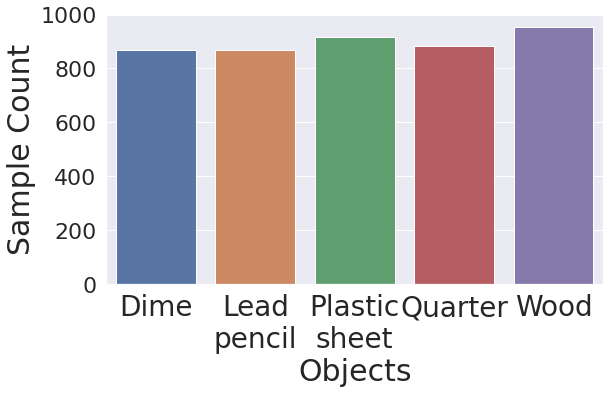

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

X_sunnyData70, X_sunnyData30,y_sunnyData70, y_sunnyData30 = fileReading("sunny_7_with_paper.txt") 
X_darkData70, X_darkData30,y_darkData70, y_darkData30 = fileReading("night_7_with_paper.txt")
X_lablightData70, X_lablightData30, y_lablightData70,y_lablightData30 = fileReading("lablight_7_with_paper.txt")

sunny_data_label_count = np.sum(y_sunnyData70,axis=0)+np.sum(y_sunnyData30,axis=0)
lablight_data_label_count = np.sum(y_lablightData70,axis=0)+np.sum(y_lablightData30,axis=0)
dark_data_label_count = np.sum(y_darkData70,axis=0)+np.sum(y_darkData30,axis=0)

print(sunny_data_label_count)
print(lablight_data_label_count)
print(dark_data_label_count)


def dataDistribution(data_label_count,name):

  sns.set(rc={'figure.figsize':(9,6)}, font_scale = 2)
  # sns.set()
  ax = sns.barplot(x=['Dime', 'Lead\npencil', 'Plastic\nsheet', 'Quarter' ,'Wood'],y=data_label_count)
  # ax.set(xlabel='activity', ylabel='count')

  plt.xlabel('Objects', fontsize=30);
  plt.ylabel('Sample Count', fontsize=30);

  for item in ax.get_xticklabels():
      item.set_rotation(0)
      item.set_fontsize(28)

  plt.tight_layout()
  plt.savefig(name+'.pdf', bbox_inches = "tight")
  del data_label_count,name

dataDistribution(sunny_data_label_count,"sunny_data_distribution_84")
#dataDistribution(lablight_data_label_count,"lablight_data_distribution_84")
#dataDistribution(dark_data_label_count,"dark_data_distribution_84")